In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


In [2]:
final_dataset = np.concatenate((np.random.randint(10, 36, size=(25, 2)), np.random.randint(55, 76, size=(25, 2)), np.random.randint(100, 151, size=(25, 2))))

def K_Means(data, k_max=10, max_iterations=100):
    distorts = []

    for k in range(1, k_max + 1):
        centrr = initialize_centroids(data, k)
        labelss = np.zeros(len(data), dtype=int)

        for _ in range(max_iterations):
            distances = np.linalg.norm(data - centrr[:, np.newaxis], axis=2)
            new_labels = np.argmin(distances, axis=0)

            if np.array_equal(labelss, new_labels):
                break

            labelss = new_labels
            centrr = update_centroids(data, labelss, k)

        distorts.append(calculate_distortion(data, labelss, centrr))

    return distorts


In [3]:
def initialize_centroids(data, k):
    return data[np.random.choice(range(len(data)), k, replace=False)]

def update_centroids(data, labels, k):
    return np.array([data[labels == j].mean(axis=0) for j in range(k)])

def calculate_distortion(data, labels, centroids):
    distt = np.linalg.norm(data - centroids[labels], axis=1)
    return sum(distt)


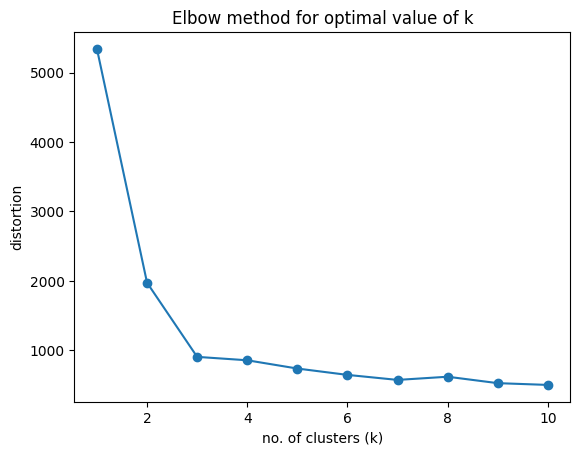

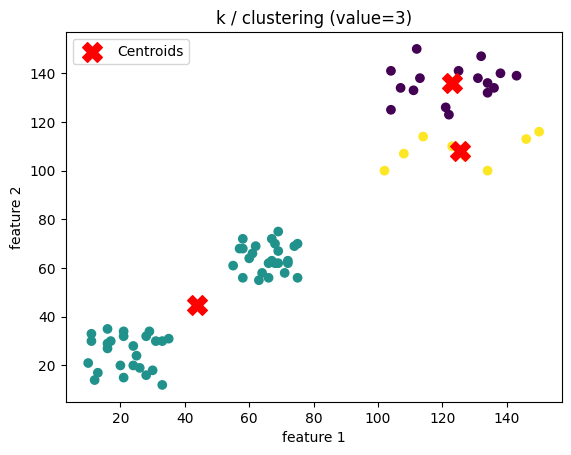

In [7]:
k_valuess = range(1, 11)
distorts = K_Means(final_dataset, k_max=10)

plt.plot(k_valuess, distorts, marker='o')
plt.title('Elbow method for optimal value of k')
plt.xlabel('no. of clusters (k)')
plt.ylabel('distortion')
plt.show()

optimal_k = np.argmin(np.diff(distorts)) + 3

centroids = final_dataset[np.random.choice(range(len(final_dataset)), optimal_k, replace=False)]
prev_centroids = np.zeros_like(centroids)

while not np.array_equal(centroids, prev_centroids):
    prev_centroids = centroids
    distances = np.linalg.norm(final_dataset[:, np.newaxis, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    centroids = np.array([final_dataset[labels == j].mean(axis=0) for j in range(optimal_k)])

plt.scatter(final_dataset[:, 0], final_dataset[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title(f'k / clustering (value={optimal_k})')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()